In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    LogisticRegression,
    SGDClassifier,
    BayesianRidge,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    BaggingClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.svm import LinearSVC
from numpy.ma.core import sqrt
from sklearn.model_selection import GridSearchCV, cross_val_score
from numpy.polynomial.polynomial import polyfit
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    confusion_matrix,
)

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.shape

(395, 33)

In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

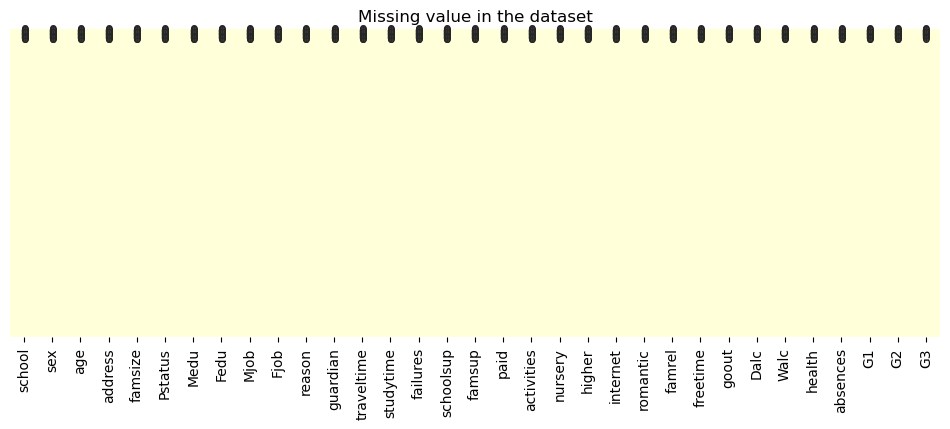

In [8]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cmap='YlGnBu', cbar=False, yticklabels=False, annot=True, fmt='d')
plt.title('Missing value in the dataset');

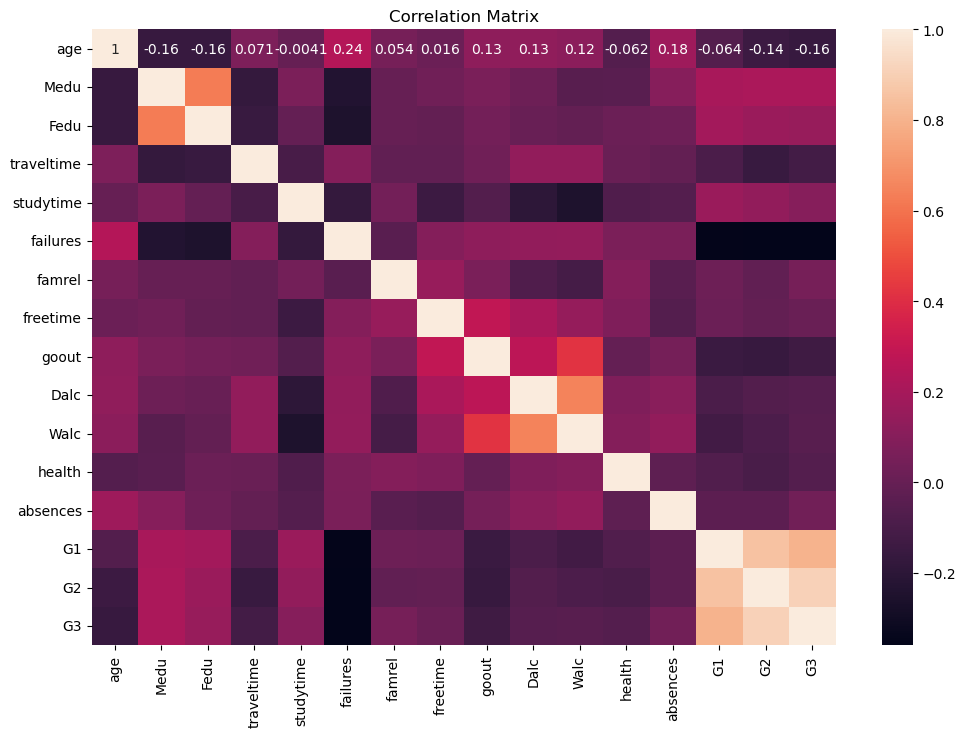

In [9]:
#Correlation Matrix
numerical_data = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

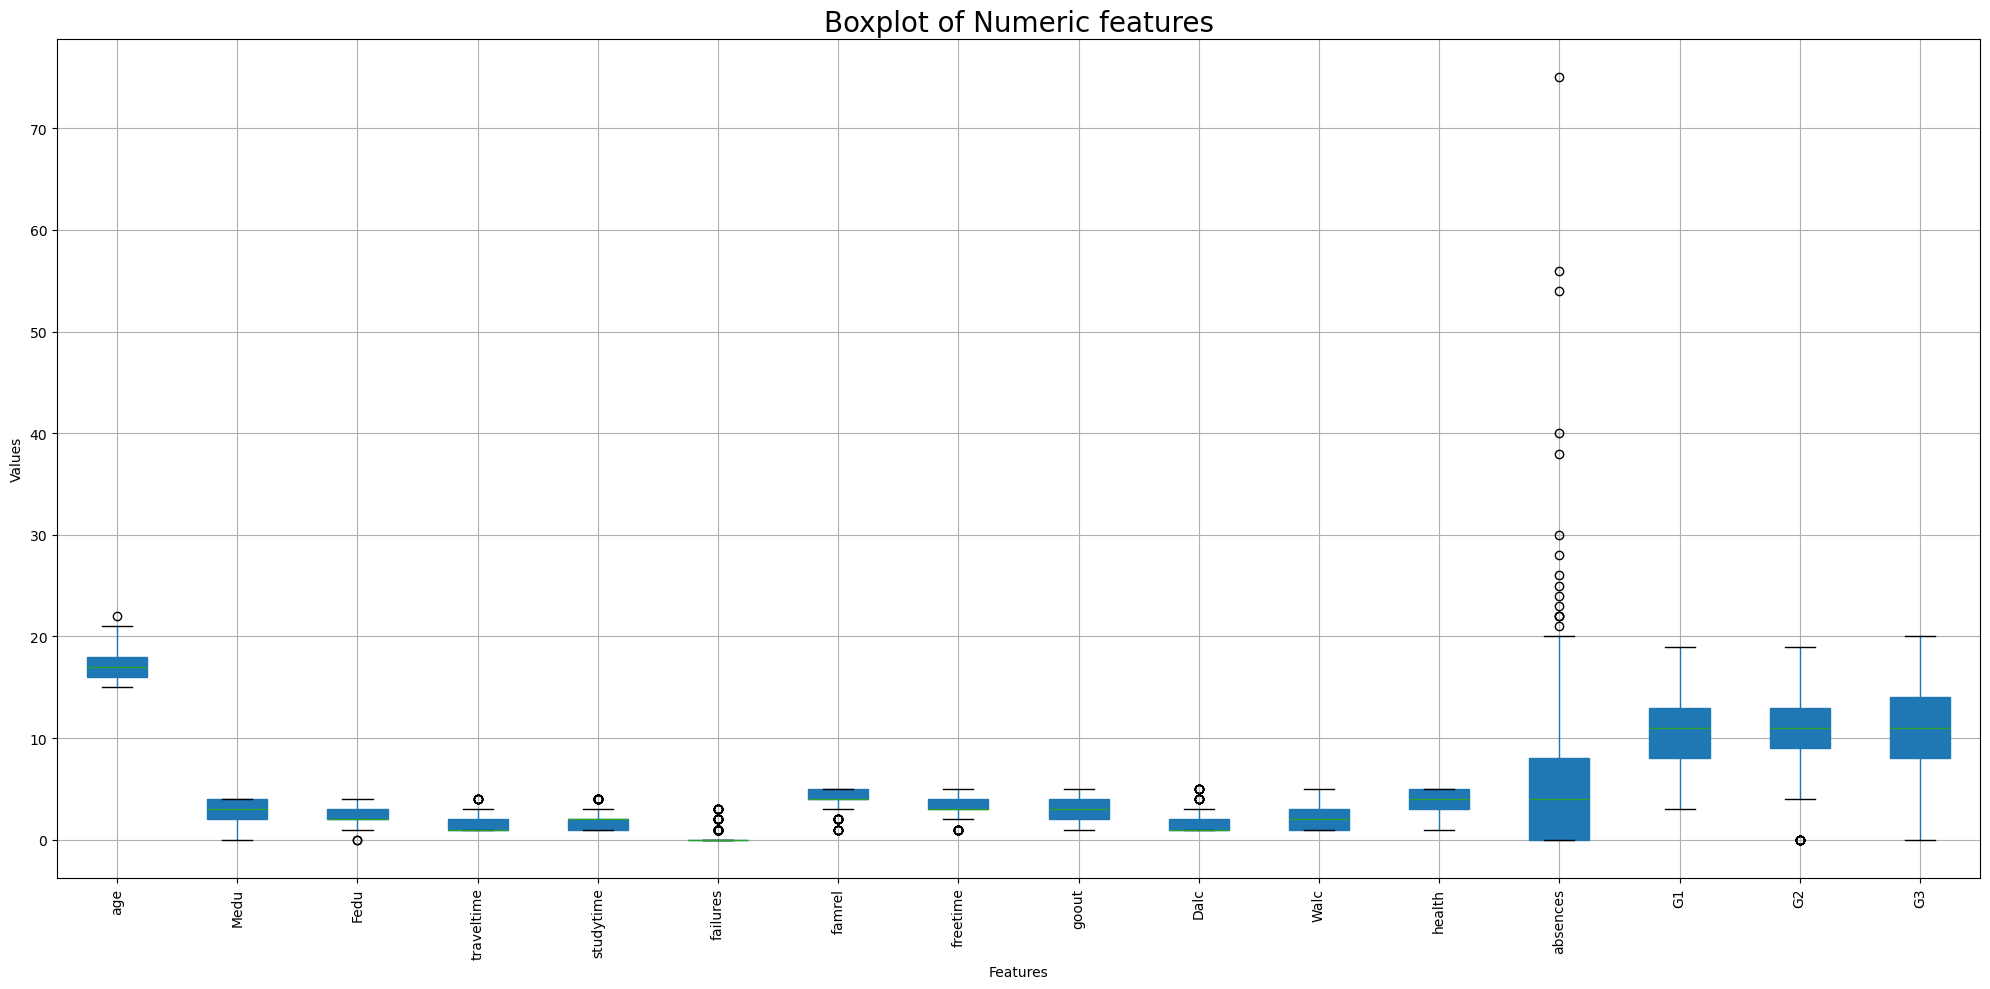

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
boxplot = df.boxplot(vert=True, patch_artist=True)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric features', fontsize=20)
plt.tight_layout() 
plt.show()


In [11]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'school':
['GP' 'MS']

Unique values in 'sex':
['F' 'M']

Unique values in 'age':
[18 17 15 16 19 22 20 21]

Unique values in 'address':
['U' 'R']

Unique values in 'famsize':
['GT3' 'LE3']

Unique values in 'Pstatus':
['A' 'T']

Unique values in 'Medu':
[4 1 3 2 0]

Unique values in 'Fedu':
[4 1 2 3 0]

Unique values in 'Mjob':
['at_home' 'health' 'other' 'services' 'teacher']

Unique values in 'Fjob':
['teacher' 'other' 'services' 'health' 'at_home']

Unique values in 'reason':
['course' 'other' 'home' 'reputation']

Unique values in 'guardian':
['mother' 'father' 'other']

Unique values in 'traveltime':
[2 1 3 4]

Unique values in 'studytime':
[2 3 1 4]

Unique values in 'failures':
[0 3 2 1]

Unique values in 'schoolsup':
['yes' 'no']

Unique values in 'famsup':
['no' 'yes']

Unique values in 'paid':
['no' 'yes']

Unique values in 'activities':
['no' 'yes']

Unique values in 'nursery':
['yes' 'no']

Unique values in 'higher':
['yes' 'no']

Unique values in 'interne

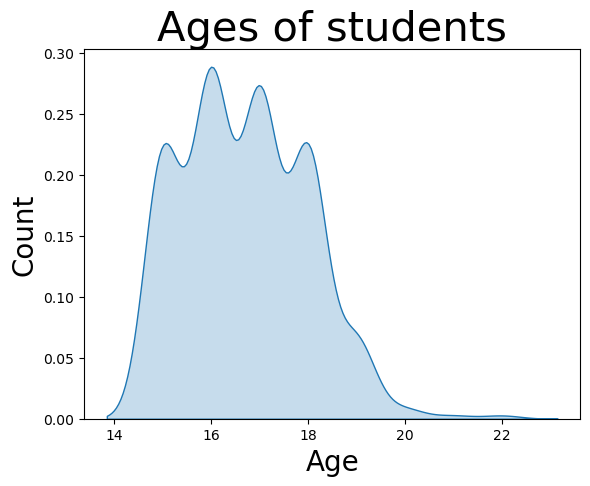

In [12]:
b = sns.kdeplot(df['age'], shade=True)
b.axes.set_title('Ages of students', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

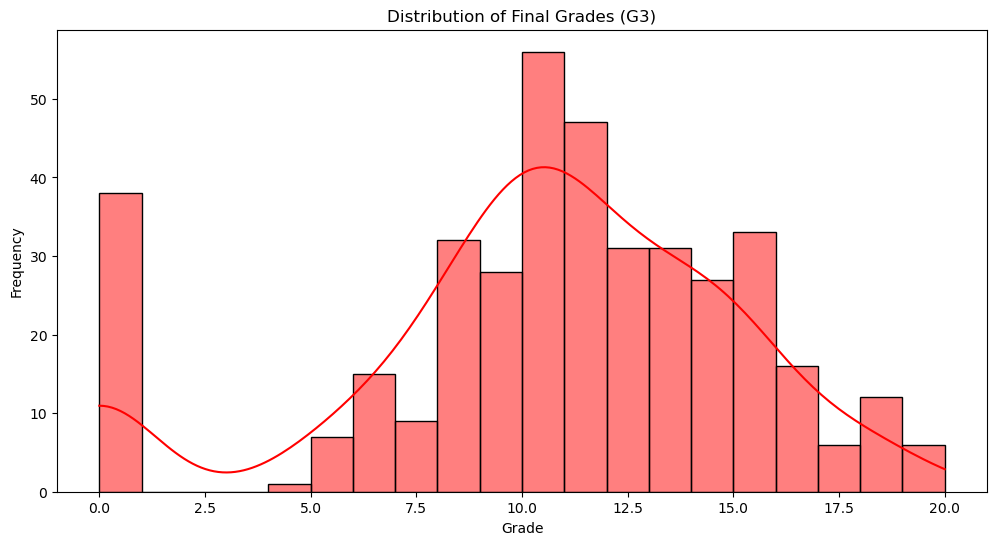

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df['G3'], bins=20, kde=True, color='red')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

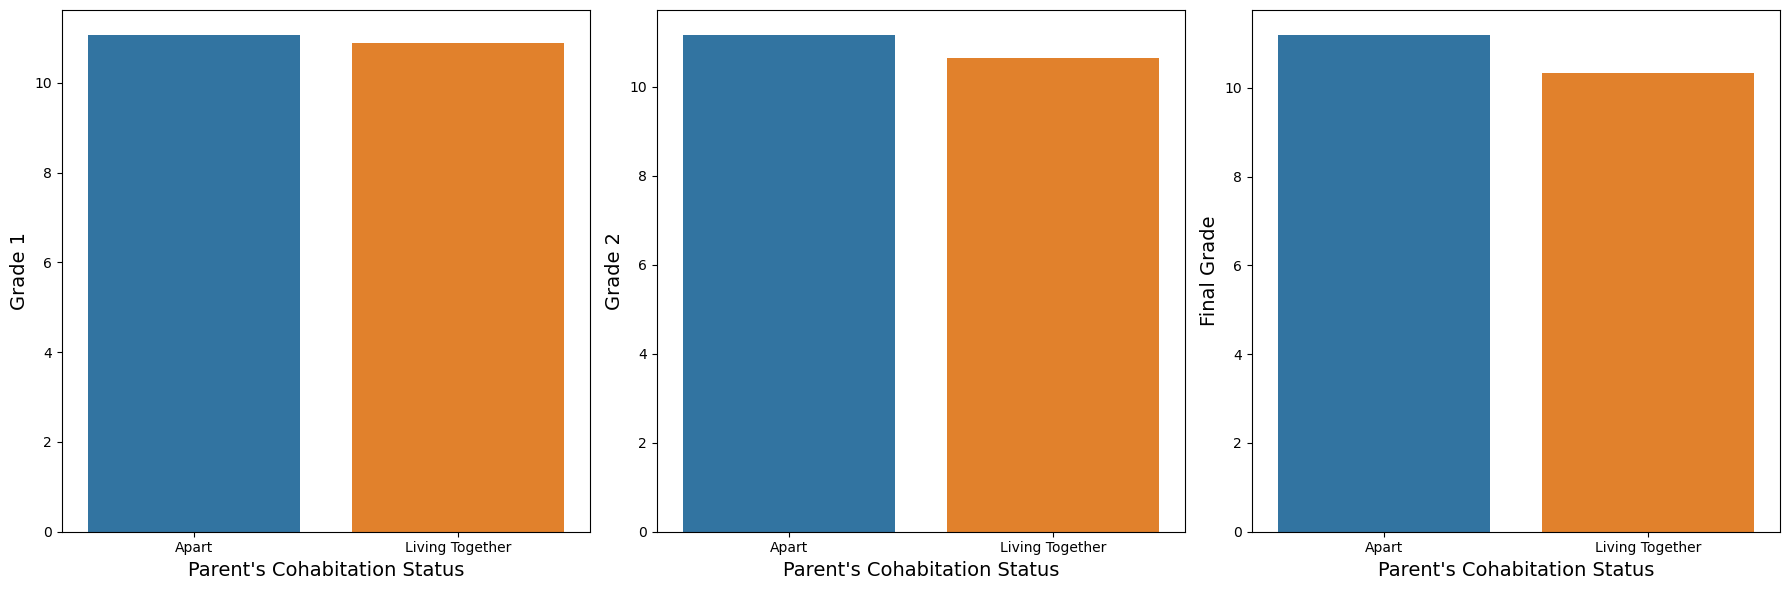

In [14]:

fig, axs = plt.subplots(1, 3, figsize=(18, 6))


b1 = sns.barplot(x=df['Pstatus'], y=df['G1'], data=df, ci=None, ax=axs[0])
b1.set_xlabel("Parent's Cohabitation Status", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(["Apart", "Living Together"])


b2 = sns.barplot(x=df['Pstatus'], y=df['G2'], data=df, ci=None, ax=axs[1])
b2.set_xlabel("Parent's Cohabitation Status", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(["Apart", "Living Together"])

b3 = sns.barplot(x=df['Pstatus'], y=df['G3'], data=df, ci=None, ax=axs[2])
b3.set_xlabel("Parent's Cohabitation Status", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(["Apart", "Living Together"])

plt.tight_layout()

plt.show()

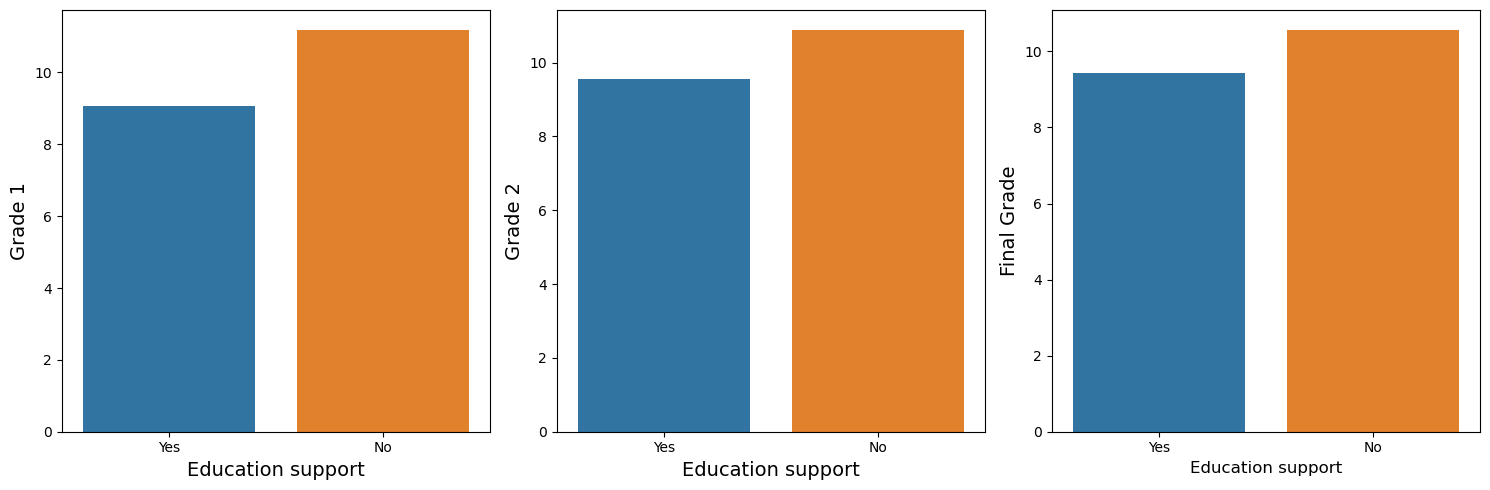

In [15]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart
b = sns.barplot(x=df['schoolsup'], y=df['G1'], data=df, ci=None, ax=axes[0])
b.set_xlabel('Education support', fontsize=14)
b.set_ylabel('Grade 1', fontsize=14)
custom_xtitles = ["Yes", "No"]  # Replace with your desired labels
b.set_xticklabels(custom_xtitles)

# Plot the second chart
b2 = sns.barplot(x=df['schoolsup'], y=df['G2'], data=df, ci=None, ax=axes[1])
b2.set_xlabel('Education support', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(custom_xtitles)

# Plot the third chart
b3 = sns.barplot(x=df['schoolsup'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Education support', fontsize=12)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(custom_xtitles)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

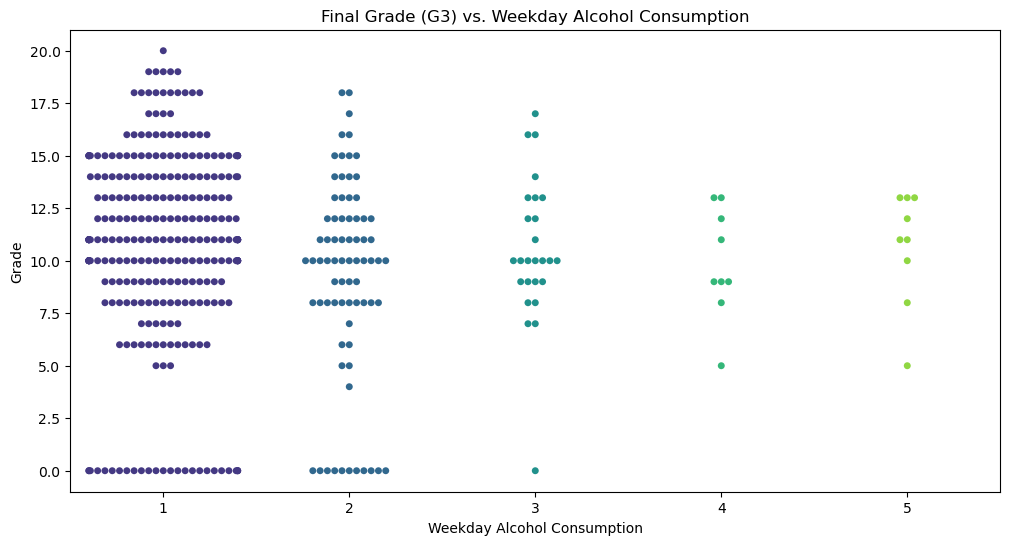

In [16]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Dalc', y='G3', data=df, palette='viridis')
plt.title('Final Grade (G3) vs. Weekday Alcohol Consumption')
plt.xlabel('Weekday Alcohol Consumption')
plt.ylabel('Grade')
plt.show()

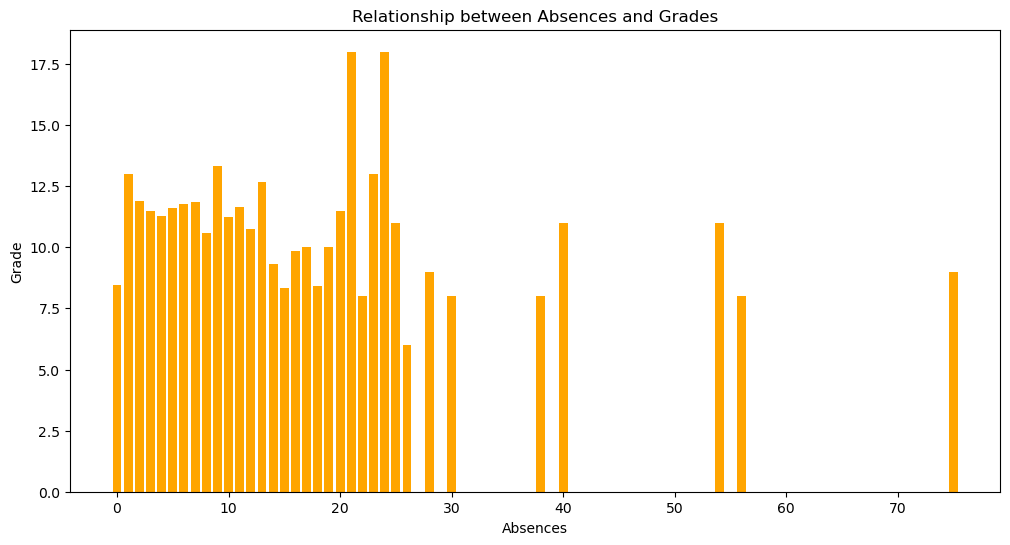

In [17]:
absences_grade = df.groupby('absences')['G3'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(absences_grade.index, absences_grade.values, color='orange')
plt.title('Relationship between Absences and Grades')
plt.xlabel('Absences')
plt.ylabel('Grade')
plt.show()
#less absence-->higher grades

Text(0.5, 135.7222222222222, 'Romantic Relation')

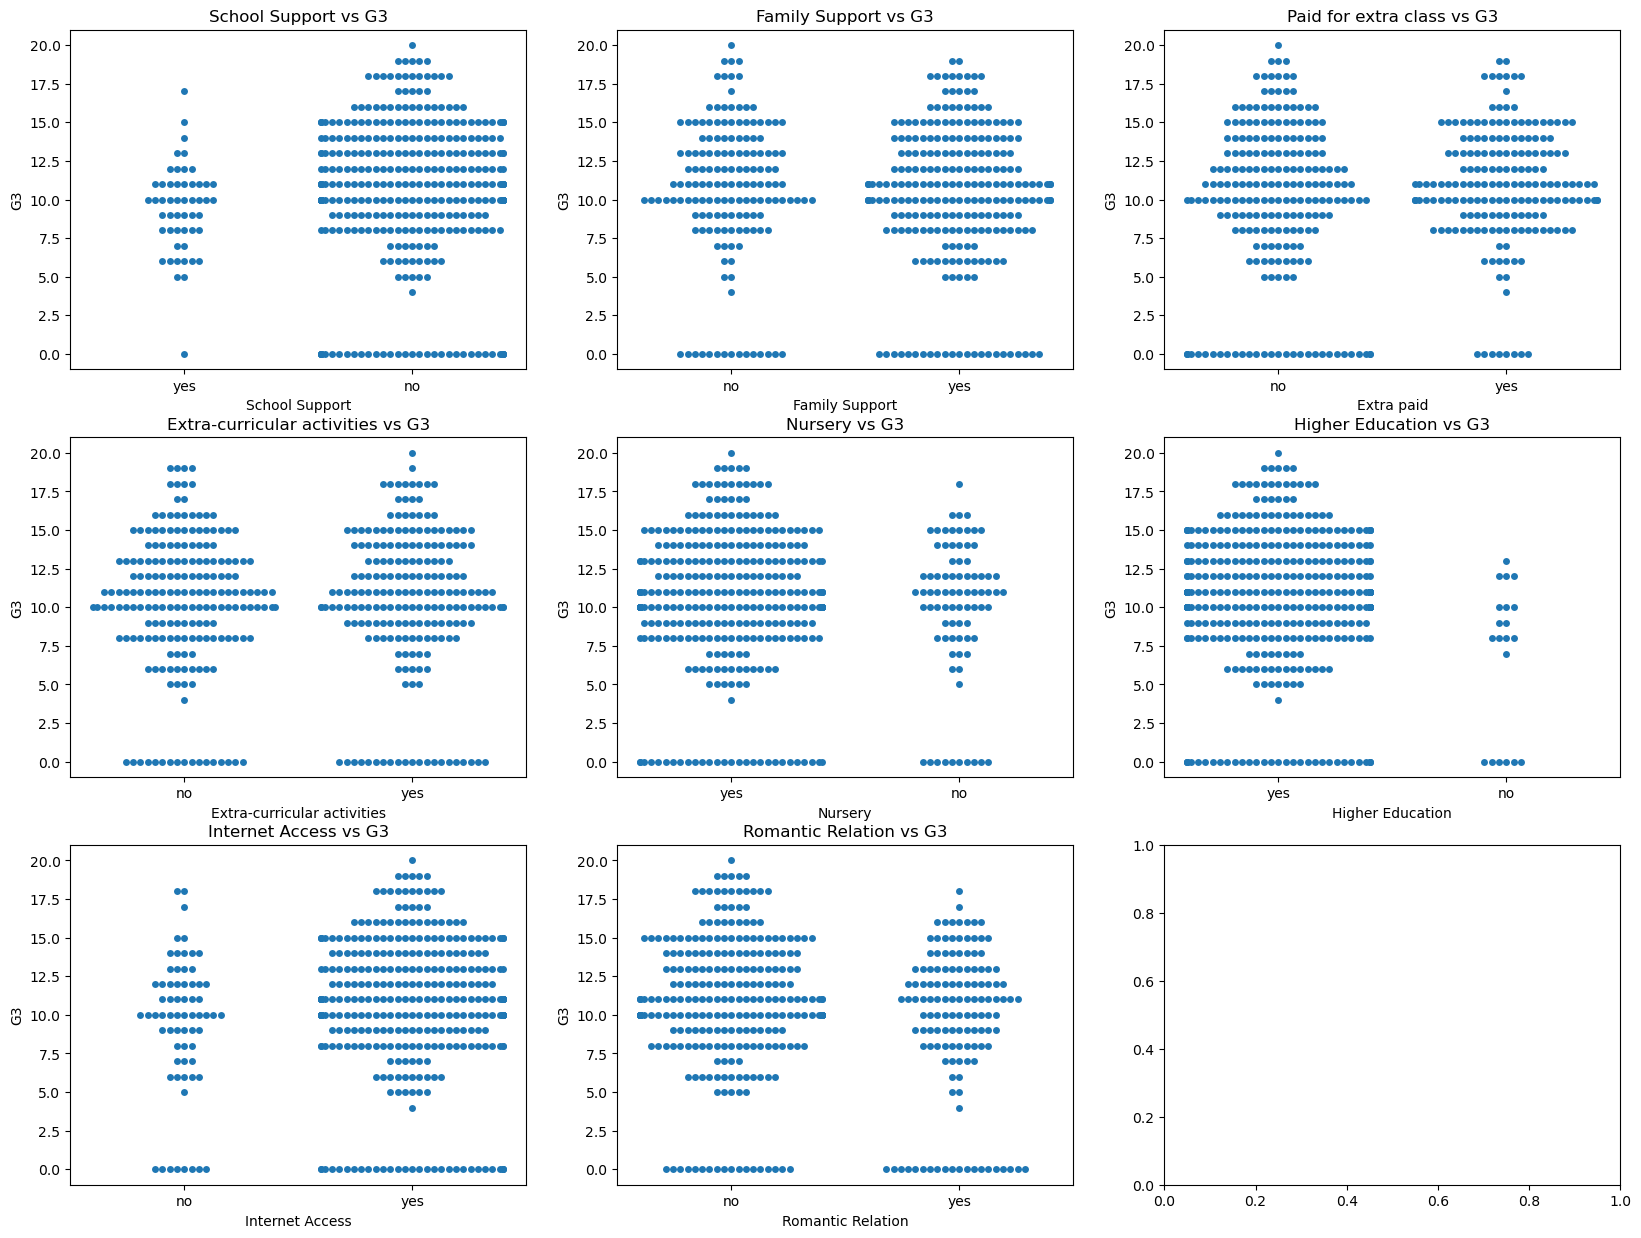

In [18]:
fg, axs = plt.subplots(3,3, figsize=(20,15))

axs[0,0].set_title('School Support vs G3')
sns.swarmplot(x='schoolsup', y='G3', data=df, ax=axs[0,0])
axs[0,0].set_xlabel('School Support')

axs[0,1].set_title('Family Support vs G3')
sns.swarmplot(x='famsup', y='G3', data=df, ax=axs[0,1])
axs[0,1].set_xlabel('Family Support')

axs[0,2].set_title('Paid for extra class vs G3')
sns.swarmplot(x='paid', y='G3', data=df, ax=axs[0,2])
axs[0,2].set_xlabel('Extra paid')

axs[1,0].set_title('Extra-curricular activities vs G3')
sns.swarmplot(x='activities', y='G3', data=df, ax=axs[1,0])
axs[1,0].set_xlabel('Extra-curricular activities')

axs[1,1].set_title('Nursery vs G3')
sns.swarmplot(x='nursery', y='G3', data=df, ax=axs[1,1])
axs[1,1].set_xlabel('Nursery')

axs[1,2].set_title('Higher Education vs G3')
sns.swarmplot(x='higher', y='G3', data=df, ax=axs[1,2])
axs[1,2].set_xlabel('Higher Education')

axs[2,0].set_title('Internet Access vs G3')
sns.swarmplot(x='internet', y='G3', data=df, ax=axs[2,0])
axs[2,0].set_xlabel('Internet Access')

axs[2,1].set_title('Romantic Relation vs G3')
sns.swarmplot(x='romantic', y='G3', data=df, ax=axs[2,1])
axs[2,1].set_xlabel('Romantic Relation')

In [19]:
category_df = df.select_dtypes(include=['object'])

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the grade back in the dataframe
dummy_df['G3'] = df['G3']

# Find correlations with grade
dummy_df.corr()['G3'].sort_values()

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have your DataFrame named df

# Separate features (attributes) and target
features = df.drop('G3', axis=1)  # Excluding the 'G3' column as it is the target
target = df['G3']

# Convert categorical variables into dummy/indicator variables
features = pd.get_dummies(features)

# Split the data into features (X) and target (y)
X = features
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

# Print the shapes of various sets
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X: (395, 58)
Shape of y: (395,)
Shape of X_train: (355, 58)
Shape of X_test: (40, 58)
Shape of y_train: (355,)
Shape of y_test: (40,)


In [21]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((395, 58), (395,), (355, 58), (40, 58), (355,), (40,))

In [22]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [23]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.4
Accuracy: 0.40


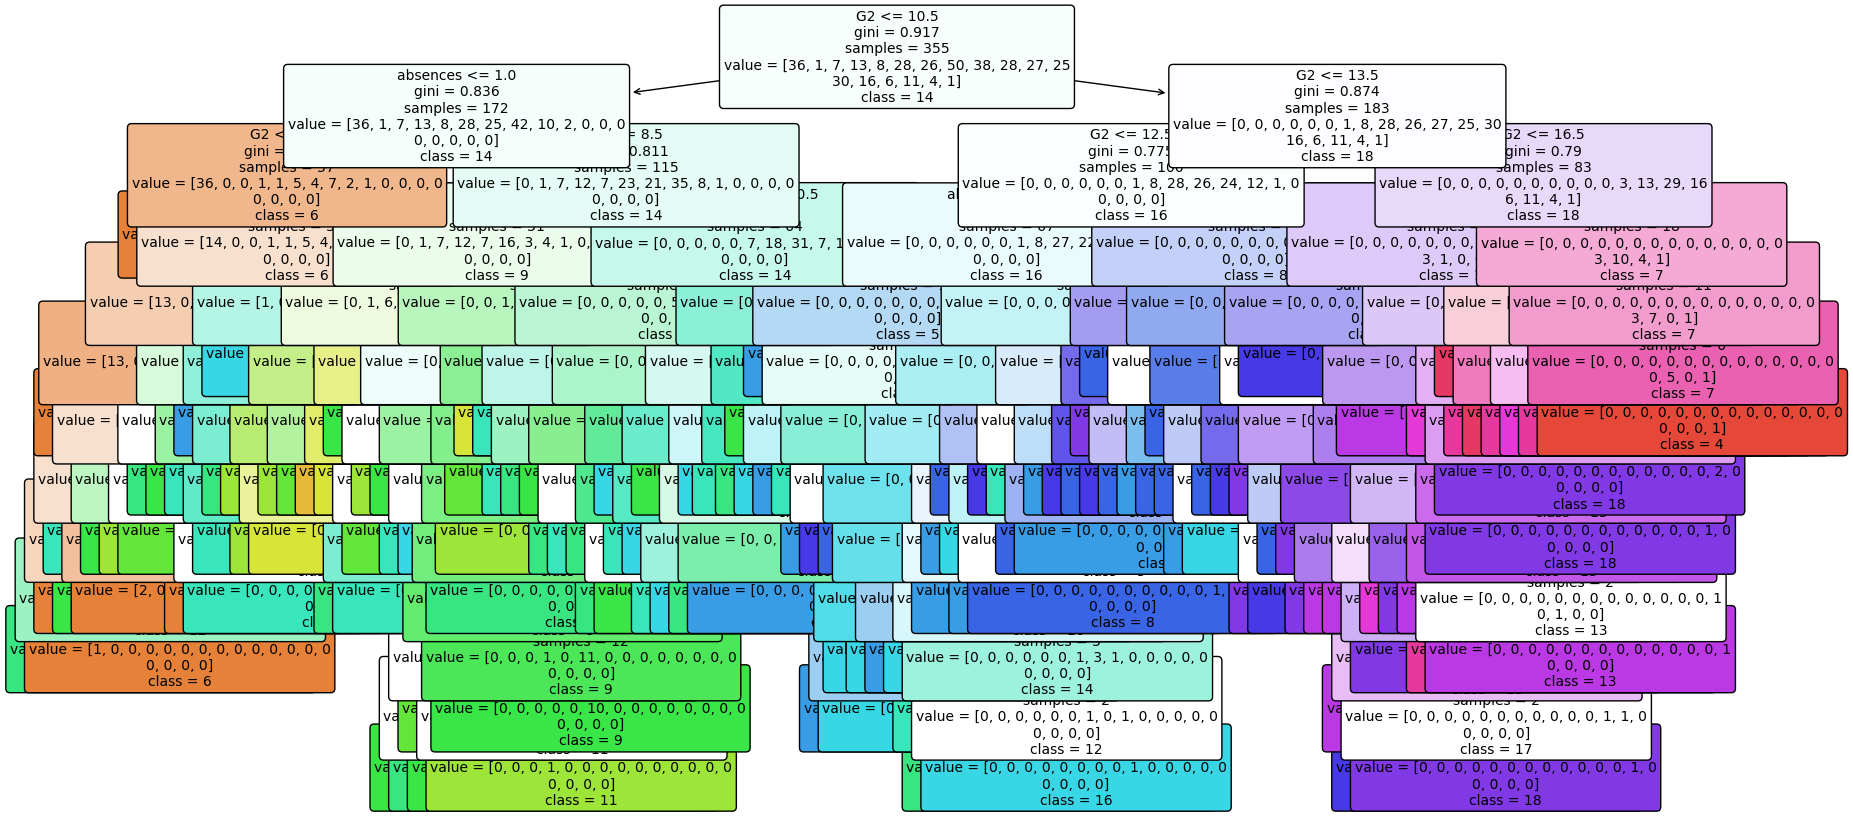

In [24]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=[str(label) for label in df['G3'].unique()], rounded=True, fontsize=10)
plt.show()

In [25]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.325


              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.33      0.50      0.40         4
           9       0.00      0.00      0.00         2
          10       0.31      0.67      0.42         6
          11       0.00      0.00      0.00         9
          12       0.33      0.33      0.33         3
          13       0.00      0.00      0.00         4
          14       0.29      1.00      0.44         2
          15       1.00      0.67      0.80         3
          18       0.50      1.00      0.67         1
          19       0.00      0.00      0.00         1

    accuracy                           0.33        40
   macro avg       0.25      0.36      0.27        40
weighted avg       0.23      0.33      0.25        40



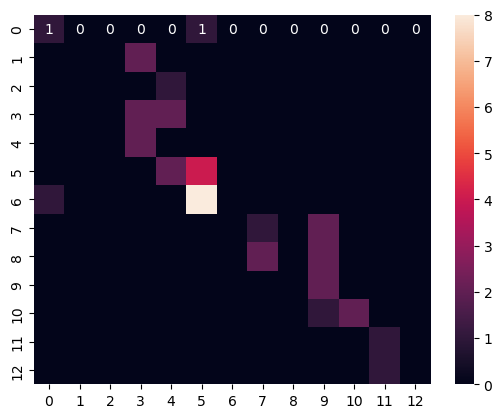

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
#Predict the response for test dataset
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
print(classification_report(y_test, y_pred))

In [32]:
def rmse_cv(model, X, y):
    """Calculate the Root Mean Squared Error (RMSE) using cross-validation."""
    neg_mse = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
    rmse = np.sqrt(-neg_mse).mean()
    return rmse

def evaluation(y_true, y_pred):
    """Evaluate the model's performance using various metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_true, y_pred)
    return mae, mse, rmse, r_squared

In [33]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)

rmse_cross_val = rmse_cv(lin_reg, X, y)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({
    "Model": ["LinearRegression"],
    "MAE": [mae],
    "MSE": [mse],
    "RMSE": [rmse],
    "R2 Score": [r_squared],
    "RMSE (Cross-Validation)": [rmse_cross_val]
})
models = pd.concat([models, new_row], ignore_index=True)

MAE: 1.2723896026611328
MSE: 3.7438180978642777
RMSE: 1.9348948544725313
R2 Score: 0.7282657885781689
------------------------------
RMSE Cross-Validation: 2.03651982651715


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Define the algorithms you want to evaluate
classifiers = [LogisticRegression()]

# Define the training split ratios
split_ratios = [0.2, 0.25, 0.3]

# Perform cross-validation for each split ratio and algorithm
for split_ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split_ratio, random_state=42)
    for clf in classifiers:
        scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation
        print(f"Split ratio: {split_ratio}, Algorithm: {clf.__class__.__name__}, Mean accuracy: {scores.mean()}, Standard deviation: {scores.std()}")


In [ ]:
models.sort_values(by="RMSE (Cross-Validation)")

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=10)
plt.xticks(rotation=20, size=12)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
boxplot = df.boxplot(vert=True, patch_artist=True)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric features', fontsize=20)
plt.tight_layout() 
plt.show()

In [ ]:
def train_regression_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

    model1 = LinearRegression()
    model2 = RandomForestRegressor()
    model3 = DecisionTreeRegressor()

    models = [model1, model2, model3]
    model_name_list = ['LinearRegression','RandomForestRegressor','DecisionTreeRegressor']

    # Dataframe for results
    results = pd.DataFrame(columns=['MAE', 'RMSE', 'RMSE by cross validation', 'MSE', 'R^2'], index=model_name_list)

    for i, model in enumerate(models):
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_test_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)
        rmse = np.sqrt(mse)
        r_squared = r2_score(y_test, y_test_pred)

        # Cross-validation
        scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
        rmse_cross_val = np.sqrt(-scores.mean())

        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse, rmse_cross_val ,mse,r_squared ]

    return results

In [ ]:
from sklearn.tree import DecisionTreeRegressor
train_regression_model(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

best_model1 = RandomForestRegressor()
best_model1.fit(X_train, y_train)

y_test_pred = best_model1.predict(X_test)

In [ ]:
n,m=polyfit(y_test, y_test_pred, 1)
plt.figure(figsize=(8,5))
plt.scatter(x = y_test, y = y_test_pred, c="Blue")
plt.plot(y_test,  m*(y_test) + n   ,':', c="black")

plt.xlabel("Truth")
plt.ylabel("Predicted")